In [20]:
import ginza

In [ ]:
!pip list

In [ ]:
import spacy

In [23]:
from spacy import displacy
nlp = spacy.load('ja_ginza')

In [24]:
import spacy
# nlp = spacy.load('ja_ginza_electra')
nlp = spacy.load('ja_ginza')

doc = nlp('銀座でランチをご一緒しましょう。')
for sent in doc.sents:
    for token in sent:
        print(
#             token.i,
            token.orth_,
            token.lemma_,
            token.norm_,
            token.morph.get("Reading"),
            token.pos_,
            token.morph.get("Inflection"),
            token.tag_,
            token.dep_,
            token.head.i,
        )
#     print('EOS')

銀座 銀座 銀座 ['ギンザ'] PROPN [] 名詞-固有名詞-地名-一般 nmod 5
で で で ['デ'] ADP [] 助詞-格助詞 case 0
ランチ ランチ ランチ ['ランチ'] NOUN [] 名詞-普通名詞-一般 obj 5
を を を ['ヲ'] ADP [] 助詞-格助詞 case 2
ご ご 御 ['ゴ'] NOUN [] 接頭辞 compound 5
一緒 一緒 一緒 ['イッショ'] NOUN [] 名詞-普通名詞-サ変可能 ROOT 5
し する 為る ['シ'] AUX ['サ行変格;連用形-一般'] 動詞-非自立可能 aux 5
ましょう ます ます ['マショウ'] AUX ['助動詞-マス;意志推量形'] 助動詞 aux 5
。 。 。 ['。'] PUNCT [] 補助記号-句点 punct 5


In [4]:
import spacy
nlp = spacy.load('ja_ginza')

text = """
人を、信ずる事が出来ぬ、というのです。
三日のうちに、私は村で結婚式を挙げさせ、必ず、ここへ帰って来ます。
そうして身代りの男を、三日目に殺してやるのも気味がいい。
ものも言いたくなくなった。
そうして、少し事情があるから、結婚式を明日にしてくれ、と頼んだ。
あれが沈んでしまわぬうちに、王城に行き着くことが出来なかったら、あの佳い友達が、私のために死ぬのです。
何をするのだ。
けれども、今になってみると、私は王の言うままになっている。
王は、ひとり合点して私を笑い、そうして事も無く私を放免するだろう。
私を、待っている人があるのだ。
死んでお詫び、などと気のいい事は言って居られぬ。
メロス。
その人を殺してはならぬ。
メロスが帰って来た。
メロスだ。
"""
texts = nlp(text)
# print(texts)
for sent in texts.sents:
    for token in sent:
        print(token)
#         print(
# #             token.i,
#             token.orth_,
#             token.lemma_,
#             token.norm_,
#             token.morph.get("Reading"),
#             token.pos_,
#             token.morph.get("Inflection"),
#             token.tag_,
#             token.dep_,
#             token.head.i,
#         )



人
を
、
信ずる
事
が
出来
ぬ
、
と
いう
の
です
。


三
日
の
うち
に
、
私
は
村
で
結婚式
を
挙げ
させ
、
必ず
、
ここ
へ
帰っ
て
来
ます
。


そう
し
て
身代り
の
男
を
、
三
日
目
に
殺し
て
やる
の
も
気味
が
いい
。


もの
も
言い
たく
なく
なっ
た
。


そう
し
て
、
少し
事情
が
ある
から
、
結婚式
を
明日
に
し
て
くれ
、
と
頼ん
だ
。


あれ
が
沈ん
で
しまわ
ぬ
うち
に
、
王城
に
行き着く
こと
が
出来
なかっ
たら
、
あの
佳い
友達
が
、
私
の
ため
に
死ぬ
の
です
。


何
を
する
の
だ
。


けれど
も
、
今
に
なっ
て
みる
と
、
私
は
王
の
言う
まま
に
なっ
て
いる
。


王
は
、
ひとり合点
し
て
私
を
笑い
、
そう
し
て
事
も
無く
私
を
放免
する
だろう
。


私
を
、
待っ
て
いる
人
が
ある
の
だ
。


死ん
で
お
詫び
、
など
と
気
の
いい
事
は
言っ
て
居
られ
ぬ
。


メロス
。


その
人
を
殺し
て
は
なら
ぬ
。


メロス
が
帰っ
て
来
た
。


メロス
だ
。




## Text Loading and Cleaning

In [26]:
import numpy as np
from os import listdir
import os.path as osp
import pandas as pd

path = "data/register.xls"
labels = pd.read_excel(path)
labels

In [30]:
from collections import Counter
Counter(labels.作文テーマ)

Counter({'外国語がうまくなる方法について': 192, 'インターネット時代に新聞や雑誌は必要か': 112})

In [31]:
import numpy as np
label1 = labels.loc[labels.作文テーマ == "外国語がうまくなる方法について",:]
label1

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
0,CG009,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,C
1,CG011,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
2,CG013,男,国外,外国語がうまくなる方法について,中国語,2年未満,上級,A,A
3,CG015,男,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
4,CG017,女,国外,外国語がうまくなる方法について,中国語,2年未満,中級,B,A
...,...,...,...,...,...,...,...,...,...
299,KN303,女,国内,外国語がうまくなる方法について,韓国語,2年未満,中級,X,X
300,KN307,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
301,KN312,女,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X
302,KN313,男,国内,外国語がうまくなる方法について,韓国語,2年以上5年未満,上級,X,X


In [32]:
label2 = labels.loc[labels.作文テーマ == "インターネット時代に新聞や雑誌は必要か",:]
label2

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
76,CG101,男,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
77,CG102,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
78,CG103,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
79,CG104,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
80,CG105,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,上級,X,X
...,...,...,...,...,...,...,...,...,...
292,KG151,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,5年以上,上級,X,X
293,KG152,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年以上5年未満,上級,X,X
294,KG153,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年以上5年未満,上級,X,X
295,KG154,女,国外,インターネット時代に新聞や雑誌は必要か,韓国語,2年未満,中級,X,X


In [33]:
level1 = np.array(label1.日本語レベル)
level1, len(level1)

(array(['初級', '初級', '上級', '初級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '初級', '中級', '上級', '初級', '初級', '中級', '中級',
        '初級', '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '初級', '中級',
        '中級', '上級', '中級', '中級', '初級', '初級', '中級', '上級', '中級', '上級', '中級',
        '上級', '中級', '初級', '中級', '中級', '初級', '上級', '初級', '中級', '中級', '上級',
        '初級', '初級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '上級',
        '中級', '中級', '中級', '初級', '中級', '初級', '中級', '中級', '上級', '上級', '初級',
        '上級', '中級', '中級', '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '上級', '上級', '上級',
        '中級', '中級', '中級', '中級', '初級', '中級', '中級', '初級', '中級', '中級', '中級',
        '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '中級', '中級',
        '上級', '中級', '上級', '上級', '中級', '上級', '上級', '中級', '中級', '初級', '中級',
        '中級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '中級', '上級', '上級',
        '上級', '中級', '初級', '中級', '中級', 

In [34]:
level2 = np.array(label2.日本語レベル)
level2, len(level2)

(array(['中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '中級', '上級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級',
        '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '上級',
        '中級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '中級', '上級'], dtype=object),
 112)

In [35]:
from collections import Counter
level2_dist = Counter(level2)
level2_dist

Counter({'中級': 49, '上級': 63})

In [36]:
txt_path = "data/txt/"
# txt = pd.read()

In [37]:
from os import listdir
txt_path = "data/txt/"
txt_topics = listdir(txt_path)
txt_topics

['gaigo_txt', 'internet_txt']

In [38]:
txt_gaigo_path = txt_path + txt_topics[0]
txt_internet_path = txt_path + txt_topics[1]

In [39]:
txt_gaigo_files = listdir(txt_gaigo_path)
txt_internet_files = listdir(txt_internet_path)

In [40]:
print(txt_gaigo_files[:5])
print(txt_internet_files[:5])

['CG009.txt', 'CG011.txt', 'CG013.txt', 'CG015.txt', 'CG017.txt']
['CG101.txt', 'CG102.txt', 'CG103.txt', 'CG104.txt', 'CG105.txt']


In [ ]:
import os.path as osp
import re
gaigo_files = [f for f in listdir(osp.join(txt_path, txt_topics[0])) if f.endswith('.txt')]
gaigo = []
for gaigo_file in gaigo_files:
    # print(gaigo_file)
    with open(osp.join(txt_path, txt_topics[0], gaigo_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # type(lines)
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)

    gaigo.append(lines)
# type(gaigo[0])
# gaigo[0][0]

NameError: name 'listdir' is not defined

In [42]:
gaigo[0]

'私は大学日本語科の一年生です。最初、日本語が難しいと思いました。それから先生が日本語がうまくなる方法を聞きました。先生は「毎日単語を覚えるとか、日本語の文章を読むとか、ドラマをみます。」と言いました。私は先生が教えたとおりにしていました。毎朝、単語を読んでいました。よる、ドラマを見ていました。難しい内容をあった。先生に聞きました。重要な内容を整理しました。日本語の口頭試験がよいためにたくさん練習しました。たくさんの日本の歌を聞きました。歌を聞きながら、歌の内容を書きました。いま、私は日本語がやさしいと思います。'

In [43]:
import re
internet_files = [f for f in listdir(osp.join(txt_path, txt_topics[1])) if f.endswith('.txt')]
internet = []
for internet_file in internet_files:
    with open(osp.join(txt_path, txt_topics[1], internet_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # print(lines)
        lines = lines.strip('\ufeff□')
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)
        
    internet.append(lines)

internet[0]

'この数十年の間に、テレビや携*帯電話などの便利なものは世界的に使われていて、私たち現代人の生活に大きな役に立っているのだ。その何種類の産品の中に、一番の便利さが持っていて、生活を影響するのはコンピューターだと思う。今は、何でもコンピューターでできるんでしょう。例えば、ネットを使って、どの国にどんなことがあったかのがすぐ分かることとか、ネットで買い物したり、ホテルを予約したりすることとか、いろいろなことがただ指で完成できる。その一方で、コンピューターの発達によって、たくさん問題も次から次へと、生じる。ずっと、コンピューターで宿題やレポートをすると、今の子たちはほとんど、字がきたなくなったり、書けない漢字も昔より増えてきたらしい。だから、うまくコンピューターを利用できるかどうかは私たちにとって重要な課題になる。さっき言ったように、ネットでどんなことでもできる。もちろん、毎日のニュースや雑誌の内容もほとんどネットにある。そのため、コンビニに行って、新聞と雑誌を買う必要がなくなり、コンピューターの電源のボタンを押すと、何でも見られる。新聞代や雑誌代を使って、他方面のことで使うことができるようになったから、コンピューターがあれば、他のものはもういらないと思っている人が多いかも知れないけれども、私はそのようには思わない。コンピューターの利点はたくさんあるのは確かだけれど、その利点や便利さを頼りすぎると、悪い結果も出て来る。漢字が正しく書けなくなったり、何でもネットからコピーして、自分がどんどん考えられなくなったりするのは一番見られる現象である。ですから、いくらコンピューターが便利でも、他のところから知識とか生活能力を学習するのは昔より重要だと思っている。もちろん、新聞や雑誌はそれらの方法の中に、一番簡単に使える方法である。これからも、必要なものとして私たちの生活に存在しているのも違えない。要するに、これから、きっとたくさん生活に役に立つものが創造されるんだ。だけど、いくら生活がどんなに快適、便利になっても、自分の目で見て、手を使って、自分らしく考えておいて、そして、やることをするのが依然として、もっとも人間にとって大切なことであると、私はそうだと思っているL。※「携」は右側の部分の上に「山」'

In [44]:
# import re
# text = 'この数十年の間に、テレビや携*帯電話などの便利なものは世界的に使われていて、私たち現代人の生活に大きな役に立っているのだ。その何種類の産品の中に、一番の便利さが持っていて、生活を影響するのはコンピューターだと思う。今は、何でもコンピューターでできるんでしょう。例えば、ネットを使って、どの国にどんなことがあったかのがすぐ分かることとか、ネットで買い物したり、ホテルを予約したりすることとか、いろいろなことがただ指で完成できる。その一方で、コンピューターの発達によって、たくさん問題も次から次へと、生じる。ずっと、コンピューターで宿題やレポートをすると、今の子たちはほとんど、字がきたなくなったり、書けない漢字も昔より増えてきたらしい。だから、うまくコンピューターを利用できるかどうかは私たちにとって重要な課題になる■。\n'

# text2 = re.sub('■', '', text)
# text3 = re.sub('\n', '', text2)

In [45]:
# text2

In [ ]:
# text3

In [ ]:
from collections import defaultdict as dd
internet_tagged = dd(list)
for level, txt in zip(level1, internet):
    internet_tagged[level].append(txt)

# print(internet_tagged)

In [ ]:
gaigo_tagged = dd(list)
for level, txt in zip(level2, gaigo):
    gaigo_tagged[level].append(txt)

# print(gaigo_tagged)

In [ ]:
from collections import defaultdict as dd
text_tagged = dd(list)
for level, txt in zip(level1, internet):
    text_tagged[level].append(txt)

for level, txt in zip(level2, gaigo):
    text_tagged[level].append(txt)

# text_tagged


In [50]:
text_tagged_dict = dict(text_tagged)
text_tagged_dict

NameError: name 'text_tagged' is not defined

## Topic Modeling

In [21]:
import spacy
# nlp = spacy.load('ja_ginza_electra')
nlp = spacy.load('ja_ginza')

import tqdm
from tqdm import tqdm_notebook as tqdm

category_vectors = []

for cat, text in text_tagged_dict.items():
    for sents in tqdm(text):
        sent_vecs = []
        for sent in sents:
            sent = nlp(sent)
            word_sum = np.sum([tok.vector for tok in sent], axis=0)
            sent_vecs.append(word_sum)
        category_vectors.append((cat, np.sum(sent_vecs, axis=0)))

NameError: name 'text_tagged_dict' is not defined

## Save & load Vectors

In [16]:
import pickle 
# with open('category_vectors.pickle', 'wb') as f:
#     pickle.dump(category_vectors, f)
    
category_vectors2 = pickle.load(open('category_vectors.pickle', 'rb'))

category_vectors2[0][1].shape

(300,)

In [26]:
category_vectors2

[('初級',
  array([ 3.57287292e+01, -7.58827362e+01,  1.24936807e+00, -7.29779053e+01,
         -3.97077255e+01,  3.56424828e+01, -2.21439190e+01, -5.92729874e+01,
         -1.10292007e+02, -4.35771904e+01,  9.00261383e+01, -6.67248077e+01,
          1.76005039e+01,  5.22860336e+01, -7.67358780e+01, -1.88754730e+02,
         -6.66324463e+01, -8.76475983e+01, -1.20814514e+02, -1.35230188e+01,
         -1.10014168e+02,  1.19214073e+02, -1.24844275e+01,  5.53562355e+01,
         -1.49190720e+02, -7.29626312e+01, -1.42883072e+02,  4.88118095e+01,
         -1.22850742e+01,  2.68320770e+01, -2.12292147e+00, -6.96348877e+01,
          6.31821632e+01,  9.47249680e+01,  1.55110226e+01,  1.45674715e+01,
         -9.14707260e+01,  7.97883453e+01, -9.24310760e+01,  1.72000110e+00,
          1.02983154e+02,  9.96699677e+01, -6.48623657e+01, -1.84491501e+01,
         -9.27565002e+01, -7.75970840e+01,  4.12826385e+01,  1.99926987e+01,
         -9.39902725e+01,  2.59236965e+01,  6.07591591e+01, -2.20023

In [17]:
# import pickle 
# with open('text_tagged_dict.pickle', 'wb') as f:
#     pickle.dump(text_tagged_dict, f)
import pickle 
    
text_tagged_dict2 = pickle.load(open('text_tagged_dict.pickle', 'rb'))
# text_tagged_dict2

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')

for text in text_tagged_dict2["初級"]:
    doc = nlp(text)
    for token in doc:
        if token.is_stop:
            print(token)
#     for sents in tqdm(text):
#         sent_vecs = []
#         for sent in sents:
#             sent = nlp(sent)
            

In [15]:
import spacy
nlp = spacy.load('ja_ginza')

doc = """ 私は大学日本語科の一年生です。いま、外国語がたくさんひとが学習しました。でも私は日本語より英語のほうが難しいと思いました。外国語がうまくなる、いろいろ方法が習っています。単語を覚えています。会話を読みます。聴解を聞きます。以上はすべて外国語がうまくなる方法です。日本語聴解が私にとってにくいと思います。先生は日本語聴解よくを私に言います。私は聴解教材を聞きてみました。やはり、聴解教材をよく聞きば聴解ほどよいてします。いま、私は私の日本語能力ことができるどてもいいたいと思います。 """


## Learning

In [18]:
import pandas as pd
from collections import Counter
keys, values = zip(*category_vectors2)

data = pd.DataFrame({'cat': keys, 'vectors': values})
data2 = Counter(data.cat)
data2

Counter({'初級': 22, '上級': 91, '中級': 111})

In [25]:
data

,cat,vectors
0,初級,"[35.72873, -75.88274, 1.2493681, -72.977905, -..."
1,初級,"[28.799707, -52.42878, 4.982424, -51.858414, -..."
2,初級,"[24.782848, -50.567856, 3.9012423, -45.585873,..."
3,初級,"[31.088036, -43.738503, 9.013782, -46.803497, ..."
4,初級,"[35.30096, -52.43795, 7.3700743, -53.35034, -3..."
...,...,...
219,中級,"[22.774448, -39.463764, 4.4829206, -38.366226,..."
220,中級,"[25.385881, -43.992794, -0.011346292, -45.8650..."
221,中級,"[13.380746, -38.492195, 1.7690995, -39.37492, ..."
222,中級,"[30.981627, -44.044937, 6.382059, -37.749966, ..."


In [19]:
total = len(data)
total

224

## Compute the Baseline

In [20]:
print('random baseline {}\n'.format(1.0/len(set(data.cat))))

print('most common baseline?')
for cat in data2.keys():
    print('{}: {}'.format(cat, len(data[data.cat == cat])/total))

random baseline 0.3333333333333333

most common baseline?
初級: 0.09821428571428571
上級: 0.40625
中級: 0.4955357142857143


Thus we assume that the baseline for the target texts is 0.496 and we attempt to surpass it using several neural network models

In [21]:
test = data.sample(frac=0.2, random_state=200)
train = data.drop(test.index)

test.shape, train.shape

((45, 2), (179, 2))

In [22]:
test

,cat,vectors
123,中級,"[33.23051, -68.394646, -1.6875081, -55.832527,..."
140,中級,"[34.422905, -49.717175, 5.4079256, -41.395615,..."
213,中級,"[15.381273, -27.740814, -1.0096473, -26.806993..."
80,上級,"[17.321438, -68.45032, -5.682691, -56.39933, -..."
214,中級,"[17.887836, -31.647963, 2.103015, -33.53609, -..."
210,中級,"[11.380786, -39.078796, -2.084204, -38.828304,..."
130,中級,"[35.30155, -60.96207, -5.4597173, -62.41406, -..."
39,上級,"[47.522537, -62.96684, 6.497241, -50.065758, -..."
63,上級,"[14.801305, -35.80372, -0.58077896, -39.366886..."
109,上級,"[21.965088, -59.36047, -5.71593, -50.018585, -..."


In [23]:
train

,cat,vectors
0,初級,"[35.72873, -75.88274, 1.2493681, -72.977905, -..."
1,初級,"[28.799707, -52.42878, 4.982424, -51.858414, -..."
2,初級,"[24.782848, -50.567856, 3.9012423, -45.585873,..."
3,初級,"[31.088036, -43.738503, 9.013782, -46.803497, ..."
4,初級,"[35.30096, -52.43795, 7.3700743, -53.35034, -3..."
...,...,...
219,中級,"[22.774448, -39.463764, 4.4829206, -38.366226,..."
220,中級,"[25.385881, -43.992794, -0.011346292, -45.8650..."
221,中級,"[13.380746, -38.492195, 1.7690995, -39.37492, ..."
222,中級,"[30.981627, -44.044937, 6.382059, -37.749966, ..."


## Train by Using Logistic Regression Model

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
le.fit(data.cat)
X = [x for x in train.vectors]
y = le.transform(train.cat)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clfr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clfr.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

### Evaluate the Accuracy for Logistic Regressiong Model

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
test_y = le.transform(test.cat)
test_X = [x for x in test.vectors]
pred_y = clfr.predict(test_X)

# test_y.shape, pred_y.shape
accuracy = accuracy_score(pred_y, test_y)
accuracy

0.37777777777777777

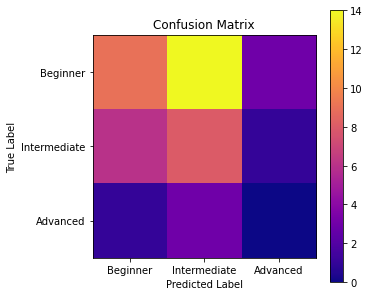

array([[ 9, 14,  3],
       [ 6,  8,  1],
       [ 1,  3,  0]], dtype=int64)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(pred_y, test_y)
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap='plasma')
plt.colorbar()
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(np.arange(3), ["Beginner", "Intermediate", "Advanced"])
plt.yticks(np.arange(3), ["Beginner", "Intermediate", "Advanced"])

plt.show()
cm

## Feedforward Neural Network Model

In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data.cat)
y = le.transform(train.cat).reshape(-1, 1)
ohe.fit(y)
y = ohe.transform(y).todense()

X = np.array([x for x in train.vectors])

X.shape, y.shape

((179, 300), (179, 3))

In [16]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
opt = keras.optimizers.Adam(learning_rate=0.0002)

In [17]:
model = Sequential()
model.add(Dense(128, input_dim=300, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               38528     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 51,139
Trainable params: 51,139
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X, y, epochs=10)

Epoch 1/10
6/6 [==============================] - 1s 7ms/step - loss: 10.9179 - accuracy: 0.3017
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 3.3220 - accuracy: 0.5196
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 2.5349 - accuracy: 0.4637
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 1.6859 - accuracy: 0.4302
Epoch 5/10
6/6 [==============================] - 0s 1ms/step - loss: 1.4610 - accuracy: 0.4358
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 1.1568 - accuracy: 0.4581
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 1.0942 - accuracy: 0.5307
Epoch 8/10
6/6 [==============================] - 0s 1ms/step - loss: 0.9851 - accuracy: 0.5084
Epoch 9/10
6/6 [==============================] - 0s 1ms/step - loss: 0.9152 - accuracy: 0.5698
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 0.9430 - accuracy: 0.5922


In [20]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data.cat)
test_y = le.transform(test.cat).reshape(-1, 1)
ohe.fit(test_y)
test_y = ohe.transform(test_y).todense()

test_X = np.array([x for x in test.vectors])

test_X.shape, test_y.shape

((45, 300), (45, 3))

In [21]:
model.predict(test_X)

2/2 [==============================] - 0s 0s/step


array([[1.27284557e-01, 7.99998224e-01, 7.27172270e-02],
       [1.58635765e-01, 6.42919838e-01, 1.98444352e-01],
       [2.30315790e-01, 7.54898489e-01, 1.47856781e-02],
       [4.40872312e-02, 9.55893278e-01, 1.94785371e-05],
       [8.88422355e-02, 9.09154236e-01, 2.00347998e-03],
       [7.86220491e-01, 2.13706166e-01, 7.33169363e-05],
       [7.83255231e-03, 9.55856502e-01, 3.63109410e-02],
       [3.79981250e-01, 3.32507610e-01, 2.87511200e-01],
       [8.74345839e-01, 1.25105247e-01, 5.48925193e-04],
       [8.76006186e-01, 1.22479424e-01, 1.51444750e-03],
       [3.46303493e-01, 6.35249496e-01, 1.84470434e-02],
       [2.85680115e-01, 7.04360247e-01, 9.95954499e-03],
       [8.83650035e-02, 4.53815311e-01, 4.57819730e-01],
       [5.06330609e-01, 4.92734283e-01, 9.35068063e-04],
       [6.52937829e-01, 3.45547736e-01, 1.51443691e-03],
       [4.76984162e-04, 6.13246500e-01, 3.86276513e-01],
       [1.55114532e-01, 8.36451828e-01, 8.43365211e-03],
       [1.76592320e-01, 6.67706

In [22]:
accuracy_score(np.argmax(model.predict(test_X), axis=1), np.argmax(test_y, axis=1))

2/2 [==============================] - 0s 1ms/step


0.4666666666666667

In [44]:
model = Sequential()
model.add(Dense(128, input_dim=300, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [45]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
#sorted(clf.cv_results_.keys())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [46]:
clf.cv_results_

{'mean_fit_time': array([0.0006001 , 0.00061111, 0.00020065, 0.00079961]),
 'std_fit_time': array([0.00048998, 0.00049977, 0.00040131, 0.00039983]),
 'mean_score_time': array([0.        , 0.00058985, 0.00040054, 0.        ]),
 'std_score_time': array([0.        , 0.00048308, 0.00049056, 0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.96666667, 0.96666667, 1.        , 0.96666667]),
 'split1_test_score': array([1.        , 0.96666667, 1.        , 1.        ]),
 'split2_test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667]),
 'split

In [47]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [26]:
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
# from keras.optimizers import Adam, Adagrad

In [27]:
input_dim = 300
output_dim = 3

In [28]:
def language_model(activation="relu", optimizer="adam", hidden_layer_sizes=(100, 100)): #, out_dim=100, ):
    model = Sequential()
    firstflag = True
    for dim in hidden_layer_sizes:
        if firstflag:
            model.add(Dense(dim, input_dim=input_dim, activation=activation))
            firstflag = False
        else:
            model.add(Dense(dim, activation=activation))
    #model.add(Dense(out_dim, input_dim=300, activation=activation))
    #model.add(Dense(out_dim, activation=activation))

    model.add(Dense(output_dim, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [29]:
activation = ["relu", "sigmoid"]
optimizer = ["adam", "adagrad", "sgd", "RMSprop", "Adamax"]
#out_dim = [100, 200]
hidden_layer_sizes = [(50, 50, 50, 50), (50, 50, 50), (100, 100), (50, ) ]
nb_epoch = [10, 25]
batch_size = [5, 10]


In [30]:
model = KerasClassifier(build_fn=language_model, verbose=0)
param_grid = dict(activation=activation, 
                  optimizer=optimizer, 
                  hidden_layer_sizes=hidden_layer_sizes, 
                  nb_epoch=nb_epoch, 
                  batch_size=batch_size,)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)


C:\Users\fic2023150.FIC.001\AppData\Local\Temp\ipykernel_5032\303135173.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=language_model, verbose=0)


In [126]:
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END activation=relu, batch_size=5, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=10, optimizer=adam; total time=   0.7s
[CV] END activation=relu, batch_size=5, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=10, optimizer=adam; total time=   0.5s
[CV] END activation=relu, batch_size=5, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=10, optimizer=adam; total time=   0.4s
[CV] END activation=relu, batch_size=5, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=10, optimizer=adam; total time=   0.4s
[CV] END activation=relu, batch_size=5, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=10, optimizer=adam; total time=   0.5s
[CV] END activation=relu, batch_size=5, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=10, optimizer=adagrad; total time=   0.7s
[CV] END activation=relu, batch_size=5, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=10, optimizer=adagrad; total time=   0.4s
[CV] END activation=relu, batch_size=5, hidden_layer_siz

In [127]:
grid.score(X, y)

0.4804469347000122

In [128]:
grid_result

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002A2524DB040>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'batch_size': [5, 10],
                         'hidden_layer_sizes': [(50, 50, 50, 50), (50, 50, 50),
                                                (100, 100), (50,)],
                         'nb_epoch': [10, 25],
                         'optimizer': ['adam', 'adagrad', 'sgd', 'RMSprop',
                                       'Adamax']},
             verbose=2)

In [31]:
import pickle 
# with open('gridcv_result.pickle', 'wb') as f:
#     pickle.dump(grid.cv_results_, f)

# with open('gridcv_best_params.pickle', 'wb') as f:
#     pickle.dump(grid.best_params_, f)
    
gridcv_result = pickle.load(open('gridcv_result.pickle', 'rb'))

gridcv_best_params = pickle.load(open('gridcv_best_params.pickle', 'rb'))

# gridcv_best_params

In [32]:
gridcv_best_params

{'activation': 'sigmoid',
 'batch_size': 10,
 'hidden_layer_sizes': (50, 50, 50),
 'nb_epoch': 25,
 'optimizer': 'adagrad'}

In [34]:
# grid_result

In [ ]:
# grid_result.cv_results_

In [132]:
grid_result.best_params_

{'activation': 'sigmoid',
 'batch_size': 10,
 'hidden_layer_sizes': (50, 50, 50),
 'nb_epoch': 25,
 'optimizer': 'adagrad'}

In [133]:
grid_result.best_score_

0.6166666626930237

In [149]:
model2 = language_model(activation=gridcv_best_params['activation'], 
                   optimizer=gridcv_best_params['optimizer'], 
                   hidden_layer_sizes=gridcv_best_params['hidden_layer_sizes'])

model2.fit(X, y, epochs=gridcv_best_params['nb_epoch'], batch_size=gridcv_best_params['batch_size'])

Epoch 1/25
18/18 [==============================] - 0s 2ms/step - loss: 0.9759 - accuracy: 0.4302
Epoch 2/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9682 - accuracy: 0.4804
Epoch 3/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9639 - accuracy: 0.4804
Epoch 4/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9607 - accuracy: 0.4804
Epoch 5/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9585 - accuracy: 0.4804
Epoch 6/25
18/18 [==============================] - 0s 957us/step - loss: 0.9567 - accuracy: 0.4804
Epoch 7/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9554 - accuracy: 0.4804
Epoch 8/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9544 - accuracy: 0.4804
Epoch 9/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9534 - accuracy: 0.4804
Epoch 10/25
18/18 [==============================] - 0s 1ms/step - loss: 0.9527 - accuracy: 0.4804
Epoch 11/25
18/18

In [150]:
from sklearn.metrics import accuracy_score
# accuracy_score(model2.predict(test_X), test_y)
accuracy_score(np.argmax(model2.predict(test_X), axis=1), np.argmax(test_y, axis=1))

2/2 [==============================] - 0s 2ms/step


0.5555555555555556

In [152]:
model2.predict(test_X)

2/2 [==============================] - 0s 2ms/step


array([[0.41423059, 0.47225347, 0.11351594],
       [0.41422632, 0.4722535 , 0.11352018],
       [0.41420543, 0.47228828, 0.11350624],
       [0.41422457, 0.47225925, 0.11351618],
       [0.41190252, 0.4767209 , 0.11137651],
       [0.4142279 , 0.47225347, 0.11351866],
       [0.41457272, 0.47251788, 0.11290936],
       [0.4145866 , 0.47248918, 0.11292418],
       [0.41380697, 0.4729741 , 0.1132189 ],
       [0.41449392, 0.47239387, 0.11311228],
       [0.41418064, 0.47232622, 0.11349319],
       [0.4132563 , 0.47401205, 0.11273165],
       [0.41423264, 0.4722564 , 0.11351098],
       [0.41299728, 0.47453085, 0.11247186],
       [0.4122939 , 0.47599617, 0.11170992],
       [0.41458058, 0.4724811 , 0.11293835],
       [0.41451716, 0.47241405, 0.11306875],
       [0.41453126, 0.47242686, 0.11304185],
       [0.41242033, 0.4754671 , 0.11211257],
       [0.41422707, 0.47225457, 0.11351834],
       [0.41427034, 0.47226706, 0.11346257],
       [0.41446677, 0.47237185, 0.11316138],
       [0.

In [49]:
import numpy as np
# Counter(np.argmax(test_y, axis=1))
# np.argmax(test_y, axis=1).flatten()

AttributeError: 'matrix' object has no attribute 'tonumpy'

In [151]:
np.argmax(model2.predict(test_X), axis=1)

2/2 [==============================] - 0s 2ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [162]:
model2.predict(test_X)

2/2 [==============================] - 0s 2ms/step


array([[0.41423059, 0.47225347, 0.11351594],
       [0.41422632, 0.4722535 , 0.11352018],
       [0.41420543, 0.47228828, 0.11350624],
       [0.41422457, 0.47225925, 0.11351618],
       [0.41190252, 0.4767209 , 0.11137651],
       [0.4142279 , 0.47225347, 0.11351866],
       [0.41457272, 0.47251788, 0.11290936],
       [0.4145866 , 0.47248918, 0.11292418],
       [0.41380697, 0.4729741 , 0.1132189 ],
       [0.41449392, 0.47239387, 0.11311228],
       [0.41418064, 0.47232622, 0.11349319],
       [0.4132563 , 0.47401205, 0.11273165],
       [0.41423264, 0.4722564 , 0.11351098],
       [0.41299728, 0.47453085, 0.11247186],
       [0.4122939 , 0.47599617, 0.11170992],
       [0.41458058, 0.4724811 , 0.11293835],
       [0.41451716, 0.47241405, 0.11306875],
       [0.41453126, 0.47242686, 0.11304185],
       [0.41242033, 0.4754671 , 0.11211257],
       [0.41422707, 0.47225457, 0.11351834],
       [0.41427034, 0.47226706, 0.11346257],
       [0.41446677, 0.47237185, 0.11316138],
       [0.

In [141]:
np.argmax(test_y, axis=1).reshape(1, -1)

matrix([[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
         1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0,
         1, 0, 1]], dtype=int64)

In [135]:
accuracy_score(grid.predict(test_X), np.argmax(test_y, axis=1))

2/2 [==============================] - 0s 2ms/step


0.5555555555555556

In [ ]:
# model2 = language_model(activation=grid_result.best_params_['activation'], 
#                    optimizer=grid_result.best_params_['optimizer'], 
#                    out_dim=grid_result.best_params_['out_dim'])
# model.summary()

In [162]:
# http://marupeke296.com/IKDADV_DL_No7_dense.html
# https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/
# https://www.tutorialspoint.com/keras/keras_dense_layer.htm#:~:text=Dense%20layer%20is%20the%20regular%20deeply%20connected%20neural,used%20in%20machine%20learning%20to%20optimize%20the%20model
# dense layer multi dimension

## LSTM(an RNN algorithm that considers sequences)

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_dim=300, activation='relu'))
# model.add(Dense(3, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [61]:
from keras import layers
import keras

model3 = keras.Sequential()

# model3.add(layers.Dense(3, activation="softmax"))

model3.add(layers.LSTM(256))

model3.add(layers.Dense(3, activation="softmax"))
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.

# model3.add(layers.Embedding(17781, 64, mask_zero = True))
# model3.add(layers.Embedding(input_dim=10000, output_dim=3))

# Add a LSTM layer with 128 internal units.
# model3.add(layers.LSTM(128))

#LSTM層
# model3.add(layers.LSTM(1000, batch_input_shape=(None, 300, 3), return_sequences=False))
# model3.add(layers.LSTM(32))

# Add a Dense layer with 10 units.

# model3.add(layers.Dense(3, activation = 'sigmoid'))
# model3.add(layers.Dense(3))

model3.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model3.summary()

TypeError: __init__() missing 1 required positional argument: 'units'

In [69]:
from keras.layers import Embedding, Bidirectional, Dense, LSTM
import keras

model4 = keras.Sequential()
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
model4.add(inputs)
model4.add(Embedding(50000, 128))
# Add 2 bidirectional LSTMs
model4.add(Bidirectional(LSTM(64, return_sequences=True)))
model4.add(Bidirectional(LSTM(64)))
# Add a classifier
model4.add(Dense(3, activation="sigmoid"))
#model = keras.Model(inputs, outputs)


model4.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 128)         6400000   
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_19 (Dense)            (None, 3)                 387       
                                                                 
Total params: 6,598,019
Trainable params: 6,598,019
Non-trainable params: 0
_________________________________________________________________


In [70]:
model4.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
# model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))

model4.fit(X, y, epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_21/embedding_18/embedding_lookup' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\fic2023150.FIC.003\AppData\Local\Temp\ipykernel_9632\3516443451.py", line 4, in <cell line: 4>
      model4.fit(X, y, epochs=10)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_21/embedding_18/embedding_lookup'
indices[19,150] = -17 is not in [0, 50000)
	 [[{{node sequential_21/embedding_18/embedding_lookup}}]] [Op:__inference_train_function_54178]

In [62]:
X.shape, y.shape, #test_X.shape, test_y.shape

((179, 300), (179, 3))

In [60]:
model3.fit(X, y, epochs=10)
# model3.predict(test_X)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\fic2023150.FIC.003\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "lstm_17" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 300)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 300), dtype=float32)
      • training=True
      • mask=None


In [6]:
import spacy
nlp = spacy.load('ja_ginza')
a = nlp("フランスは美しい")


In [8]:
a.vector.shape

(300,)

In [14]:
import numpy as np
sent = nlp("フランスは美しい")
#word_sum = np.sum([tok.vector for tok in sent], axis=0)
#word_sum        
a = np.array([tok.vector for tok in sent])
a.shape

(3, 300)

In [71]:
sent = nlp("美しいはフランス")
word_sum2 = np.sum([tok.vector for tok in sent], axis=0)
word_sum2    

array([ 0.20541844,  0.06981254, -0.15181574, -0.19650102,  0.12664604,
        0.13070539, -0.03076594, -0.26199836, -0.05935141,  0.08857816,
        0.4077132 , -0.15560386, -0.4968115 ,  0.03130277, -0.4050716 ,
       -1.182342  , -0.52030545, -0.10984713, -0.2841841 ,  0.14389984,
       -0.44435602,  0.72251076, -0.11566292, -0.0088225 , -0.11648972,
       -0.23559886, -0.73324627,  0.39784816,  0.06261075,  0.33612818,
       -0.28057522, -0.13994168,  0.32622817,  0.39167586,  0.20236656,
        0.11419073, -0.22155693,  0.17834458, -0.21881005,  0.42530173,
        0.1252254 ,  0.35306895, -0.25317585, -0.23793212, -0.11059578,
       -0.17612958,  0.19178103,  0.42768013, -0.19620429,  0.01052836,
        0.05601807, -0.29415467, -0.09432504,  0.3482819 ,  0.19634306,
        0.19625708,  0.37396502, -0.32176477,  0.03398779,  0.16432035,
        0.65104103,  0.23178801, -0.09538022,  0.10966959, -0.15087128,
       -0.5731473 ,  0.1339181 ,  0.8827145 , -0.1836529 ,  0.13

In [72]:
word_sum == word_sum2

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False,

In [76]:
t = 0
for tok in sent:
    print(tok.vector[0])
    t += tok.vector[0]
print(t)

0.376008
-0.05035316
-0.1202364
0.205418448895216


In [1]:
import tensorflow as tf

inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4)
output = lstm(inputs)
print(output.shape)

lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)
whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)
print(whole_seq_output.shape)

print(final_memory_state.shape)

print(final_carry_state.shape)


(32, 4)
(32, 10, 4)
(32, 4)
(32, 4)
